<a href="https://colab.research.google.com/github/saikrishna1108/Introduction-to-Machine-Learning/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 (20 points)

Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report the classification accuracy over iterations. Also, report your results, including accuracy, precision, and recall, FI score. At the end, plot the confusion matrix representing your binary classifier.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data_dia = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
x = data_dia.iloc[:,:-1]
y=data_dia['Outcome']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
sc = StandardScaler()

# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [5]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_std, y_train)
predicted = model.predict(X_test_std)
report = classification_report(y_test, predicted)
matrix = confusion_matrix(y_test, predicted)
print('Training accuracy:', model.score(X_train_std, y_train))
print('Test accuracy:', model.score(X_test_std, y_test))
print(report)

Training accuracy: 0.7638436482084691
Test accuracy: 0.8246753246753247
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154



Text(0.5, 427.9555555555555, 'Predicted label')

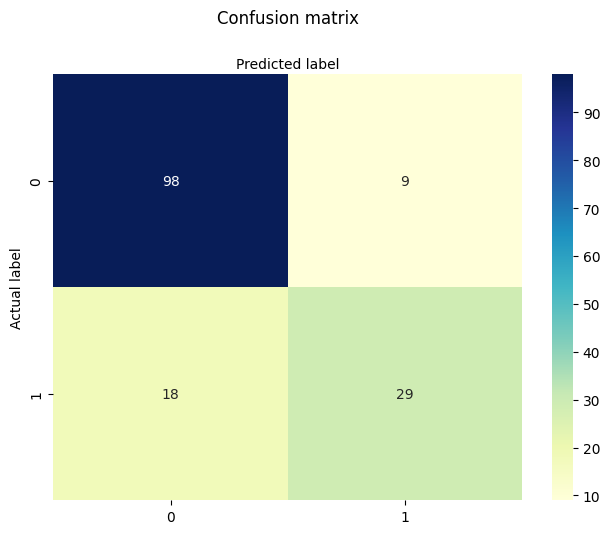

In [6]:
import seaborn as sns
from matplotlib.colors import ListedColormap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 2 (20pts):

a. Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). First, create a logistic regression that takes all 30 input features for classification. Please use 80% and 20% split between training and evaluation (test). Make sure to perform proper scaling and standardization before your training. Report your classification accuracy over iterations. Also, report your results, including accuracy, precision, recall, and F1 score. At the end, plot the confusion matrix representing your binary classifier.

b. How about adding a weight penalty here, considering the number of parameters? Add the weight penalty repeat the training, and report the results.

In [7]:
data_cancer = pd.read_csv("/content/drive/MyDrive/cancer.csv")
data_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
removed_column = data_cancer.pop('diagnosis')
data_cancer.pop('Unnamed: 32')
y_c = pd.DataFrame({'diagnosis': removed_column})
x_c = data_cancer
x_c.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(x_c, y_c, test_size=0.2, random_state=0)

In [10]:
X_trainc_std = sc.fit_transform(X_train_c)

# Apply the scaler to the test data
X_testc_std = sc.transform(X_test_c)

In [11]:
model = LogisticRegression(solver='liblinear')
model.fit(X_trainc_std, y_train_c)
predicted = model.predict(X_testc_std)
report = classification_report(y_test_c, predicted)
matrix1 = confusion_matrix(y_test_c, predicted)
print('Training accuracy:', model.score(X_trainc_std, y_train_c))
print('Test accuracy:', model.score(X_testc_std, y_test_c))
print(report)

Training accuracy: 0.989010989010989
Test accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 427.9555555555555, 'Predicted label')

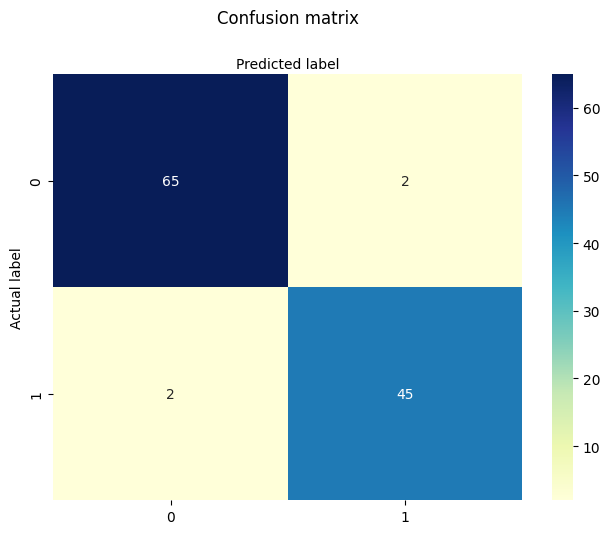

In [12]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
p_model = LogisticRegression(penalty='l1', solver='liblinear')
p_model.fit(X_trainc_std, y_train_c)
predicted = p_model.predict(X_testc_std)
report = classification_report(y_test_c, predicted)
matrix2 = confusion_matrix(y_test_c, predicted)
print('Training accuracy:', p_model.score(X_trainc_std, y_train_c))
print('Test accuracy:', p_model.score(X_testc_std, y_test_c))
print(report)

Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193
              precision    recall  f1-score   support

           B       0.96      0.97      0.96        67
           M       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 427.9555555555555, 'Predicted label')

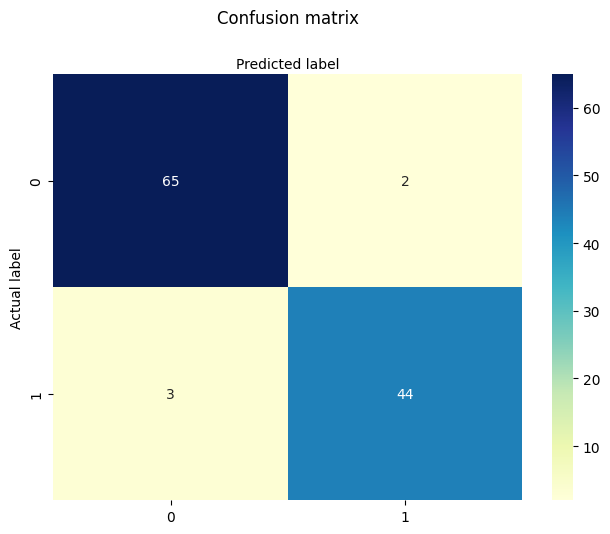

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 3 (20pts):

Use the cancer dataset to build a naive Bayesian model to classify the type of cancer (Malignant vs. benign). Use 80% and 20% split between training and evaluation (test). Report your classification accuracy, precision, recall, and F1 score. Explain and elaborate on your results. Can you compare your results against the logistic regression classifier you did in Problem 2.

In [15]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_trainc_std, y_train_c)
Y2_pred  =  classifier.predict(X_testc_std)
cm = confusion_matrix(y_test_c, Y2_pred)
ac = accuracy_score(y_test_c, Y2_pred)
report = classification_report(y_test_c, Y2_pred)
print('Confusion matrix: ',cm)
print('Accuracy: ',ac)
print('Report: ',report)

Confusion matrix:  [[61  6]
 [ 4 43]]
Accuracy:  0.9122807017543859
Report:                precision    recall  f1-score   support

           B       0.94      0.91      0.92        67
           M       0.88      0.91      0.90        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 427.9555555555555, 'Predicted label')

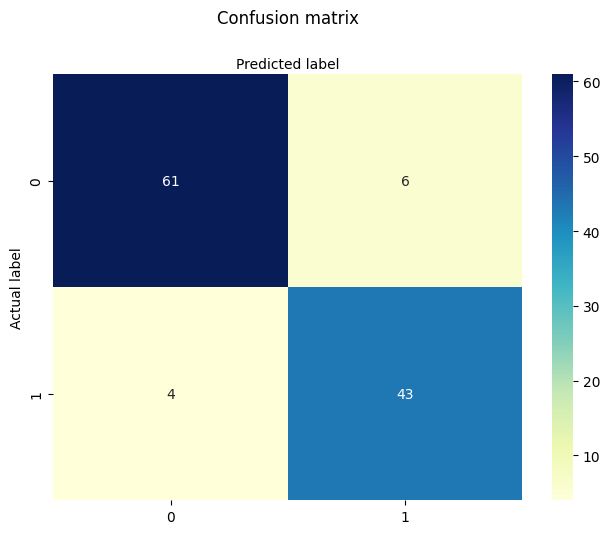

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Problem 4 (20pts):

Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Report your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problems 2 and 3.

In [53]:
X_c_std = sc.fit_transform(x_c)
from sklearn.decomposition import PCA

In [54]:
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X_c_std)
principalDf0 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(principalDf0, y_c, test_size=0.2, random_state=0)
p_model = LogisticRegression(penalty='l1', solver='liblinear')
p_model.fit(X_train_c0, y_train_c0)
predicted = p_model.predict(X_test_c0)
report = classification_report(y_test_c0, predicted)
matrix4 = confusion_matrix(y_test_c0, predicted)
print('Training accuracy:', p_model.score(X_train_c0, y_train_c0))
print('Test accuracy:', p_model.score(X_test_c0, y_test_c0))
print(report)

Training accuracy: 0.9186813186813186
Test accuracy: 0.9035087719298246
              precision    recall  f1-score   support

           B       0.92      0.91      0.92        67
           M       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_c_std)
principalDf1 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf1.head()
X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(principalDf1, y_c, test_size=0.2, random_state=0)
p_model = LogisticRegression(penalty='l1', solver='liblinear')
p_model.fit(X_train_c1, y_train_c1)
predicted = p_model.predict(X_test_c1)
report = classification_report(y_test_c1, predicted)
matrix4 = confusion_matrix(y_test_c1, predicted)
print('Training accuracy:', p_model.score(X_train_c1, y_train_c1))
print('Test accuracy:', p_model.score(X_test_c1, y_test_c1))
print(report)

Training accuracy: 0.9626373626373627
Test accuracy: 0.9385964912280702
              precision    recall  f1-score   support

           B       0.98      0.91      0.95        67
           M       0.88      0.98      0.93        47

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_c_std)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf2.head()
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(principalDf2, y_c, test_size=0.2, random_state=0)
p_model = LogisticRegression(penalty='l1', solver='liblinear')
p_model.fit(X_train_c2, y_train_c2)
predicted = p_model.predict(X_test_c2)
report = classification_report(y_test_c2, predicted)
matrix4 = confusion_matrix(y_test_c2, predicted)
print('Training accuracy:', p_model.score(X_train_c2, y_train_c2))
print('Test accuracy:', p_model.score(X_test_c2, y_test_c2))
print(report)

Training accuracy: 0.9582417582417583
Test accuracy: 0.9210526315789473
              precision    recall  f1-score   support

           B       0.95      0.91      0.93        67
           M       0.88      0.94      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_c_std)
principalDf3 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4'])
principalDf3.head()
X_train_c3, X_test_c3, y_train_c3, y_test_c3 = train_test_split(principalDf3, y_c, test_size=0.2, random_state=0)
p_model = LogisticRegression(penalty='l1', solver='liblinear')
p_model.fit(X_train_c3, y_train_c3)
predicted = p_model.predict(X_test_c3)
report = classification_report(y_test_c3, predicted)
matrix5 = confusion_matrix(y_test_c3, predicted)
print('Training accuracy:', p_model.score(X_train_c3, y_train_c3))
print('Test accuracy:', p_model.score(X_test_c3, y_test_c3))
print(report)

Training accuracy: 0.9714285714285714
Test accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           B       1.00      0.96      0.98        67
           M       0.94      1.00      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_c_std)
principalDf4 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5'])
X_train_c4, X_test_c4, y_train_c4, y_test_c4 = train_test_split(principalDf4, y_c, test_size=0.2, random_state=0)
p_model = LogisticRegression(penalty='l1', solver='liblinear')
p_model.fit(X_train_c4, y_train_c4)
predicted = p_model.predict(X_test_c4)
report = classification_report(y_test_c4, predicted)
matrix6 = confusion_matrix(y_test_c4, predicted)
print('Training accuracy:', p_model.score(X_train_c4, y_train_c4))
print('Test accuracy:', p_model.score(X_test_c4, y_test_c4))
print(report)

Training accuracy: 0.9846153846153847
Test accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        67
           M       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_c_std)
principalDf5 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3','principal component 4','principal component 5','principal component 6'])
X_train_c5, X_test_c5, y_train_c5, y_test_c5 = train_test_split(principalDf5, y_c, test_size=0.2, random_state=0)
p_model = LogisticRegression(penalty='l1', solver='liblinear')
p_model.fit(X_train_c5, y_train_c5)
predicted = p_model.predict(X_test_c5)
report = classification_report(y_test_c5, predicted)
matrix7 = confusion_matrix(y_test_c5, predicted)
print('Training accuracy:', p_model.score(X_train_c5, y_train_c5))
print('Test accuracy:', p_model.score(X_test_c5, y_test_c5))
print(report)

Training accuracy: 0.9824175824175824
Test accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        67
           M       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5) Can you repeat problem 4? This time, replace the logistic regression classifier with the Bayes classifier. Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.



In [55]:
classifier.fit(X_train_c0, y_train_c0)
Y2_pred  =  classifier.predict(X_test_c0)
cm = confusion_matrix(y_test_c0, Y2_pred)
ac = accuracy_score(y_test_c0, Y2_pred)
report = classification_report(y_test_c0, Y2_pred)
print('Confusion matrix: ',cm)
print('Accuracy: ',ac)
print('Report: ',report)

Confusion matrix:  [[61  6]
 [ 5 42]]
Accuracy:  0.9035087719298246
Report:                precision    recall  f1-score   support

           B       0.92      0.91      0.92        67
           M       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


k=2

In [46]:
classifier.fit(X_train_c1, y_train_c1)
Y2_pred  =  classifier.predict(X_test_c1)
cm = confusion_matrix(y_test_c1, Y2_pred)
ac = accuracy_score(y_test_c1, Y2_pred)
report = classification_report(y_test_c1, Y2_pred)
print('Confusion matrix: ',cm)
print('Accuracy: ',ac)
print('Report: ',report)

Confusion matrix:  [[62  5]
 [ 5 42]]
Accuracy:  0.9122807017543859
Report:                precision    recall  f1-score   support

           B       0.93      0.93      0.93        67
           M       0.89      0.89      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
classifier.fit(X_train_c2, y_train_c2)
Y2_pred  =  classifier.predict(X_test_c2)
cm = confusion_matrix(y_test_c2, Y2_pred)
ac = accuracy_score(y_test_c2, Y2_pred)
report = classification_report(y_test_c2, Y2_pred)
print('Confusion matrix: ',cm)
print('Accuracy: ',ac)
print('Report: ',report)

Confusion matrix:  [[61  6]
 [ 5 42]]
Accuracy:  0.9035087719298246
Report:                precision    recall  f1-score   support

           B       0.92      0.91      0.92        67
           M       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
classifier.fit(X_train_c3, y_train_c3)
Y2_pred  =  classifier.predict(X_test_c3)
cm = confusion_matrix(y_test_c3, Y2_pred)
ac = accuracy_score(y_test_c3, Y2_pred)
report = classification_report(y_test_c3, Y2_pred)
print('Confusion matrix: ',cm)
print('Accuracy: ',ac)
print('Report: ',report)

Confusion matrix:  [[61  6]
 [ 5 42]]
Accuracy:  0.9035087719298246
Report:                precision    recall  f1-score   support

           B       0.92      0.91      0.92        67
           M       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
classifier.fit(X_train_c4, y_train_c4)
Y2_pred  =  classifier.predict(X_test_c4)
cm = confusion_matrix(y_test_c4, Y2_pred)
ac = accuracy_score(y_test_c4, Y2_pred)
report = classification_report(y_test_c4, Y2_pred)
print('Confusion matrix: ',cm)
print('Accuracy: ',ac)
print('Report: ',report)

Confusion matrix:  [[64  3]
 [ 6 41]]
Accuracy:  0.9210526315789473
Report:                precision    recall  f1-score   support

           B       0.91      0.96      0.93        67
           M       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
classifier.fit(X_train_c5, y_train_c5)
Y2_pred  =  classifier.predict(X_test_c5)
cm = confusion_matrix(y_test_c5, Y2_pred)
ac = accuracy_score(y_test_c5, Y2_pred)
report = classification_report(y_test_c5, Y2_pred)
print('Confusion matrix: ',cm)
print('Accuracy: ',ac)
print('Report: ',report)

Confusion matrix:  [[64  3]
 [ 6 41]]
Accuracy:  0.9210526315789473
Report:                precision    recall  f1-score   support

           B       0.91      0.96      0.93        67
           M       0.93      0.87      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
